# Predicting Sales Prices

 ## Dataset Attributes

 The dataset contains information about houses in Ames, Iowa. The data was collected by the Ames City Assessor’s Office describing 2930 property sales which occurred in Ames, Iowa between 2006 and 2010. The dataset, containing 81 variables, was compiled and published by De Cock in 2011.

 Some of the variables contained in the original dataset have been removed from the the dataset provided to you.
 The dataset provided to you contains the following variables:
* **Year_Built:** year that the house was originally constructed
* **Year_Remod_Add:** year that the house was last remodelled
* **Total_Bsmt_SF:** total size of basement area in square feet
* **First_Flr_SF:** size of the first floor in square feet
* **Second_Flr_SF:** size of the second floor in square feet
* **Gr_Liv_Area:** size of above grade, ground living area in square feet
* **Full_Bath:** number of full above grade bathrooms in the house
* **Half_Bath:** number of half above grade bathrooms in the house
* **Bedroom_AbvGr:** number of above grade bedrooms (does not include basement bedrooms)
* **Kitchen_AbvGr:** number of above grade kitchens
* **TotRms_AbvGrd:** total number of above grade rooms (does not include bathrooms)
* **Fireplaces:** number of fireplaces in the house
* **Garage_Area:** size of garage in square feet
* **Sale_Price:** sale price of the house in dollars


*De Cock, D. (2011). "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester
Regression Project," Journal of Statistics Education, Volume 19, Number 3.*

- https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt
- http://ww2.amstat.org/publications/jse/v19n3/decock.pdf


# Objective: 
Build and evaluate a multiple linear regression model to predict house sale prices based on selected property features.  

# Import libraries


In [344]:
# Import libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from  sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Load Data

In [345]:
# Read in the data set
df = pd.read_csv("ames.csv")


# Exploratory Data Analysis (EDA)
Plot Histograms
Check variable distributions to understand the data's spread and shape.

   Year_Built  Year_Remod_Add  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
0        1960            1960           1080          1656              0   
1        1961            1961            882           896              0   
2        1958            1958           1329          1329              0   
3        1968            1968           2110          2110              0   
4        1997            1998            928           928            701   

   Gr_Liv_Area  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0         1656          1          0              3              1   
1          896          1          0              2              1   
2         1329          1          1              3              1   
3         2110          2          1              3              1   
4         1629          2          1              3              1   

   TotRms_AbvGrd  Fireplaces  Garage_Area  Sale_Price  
0              7           2          528      215000  
1   

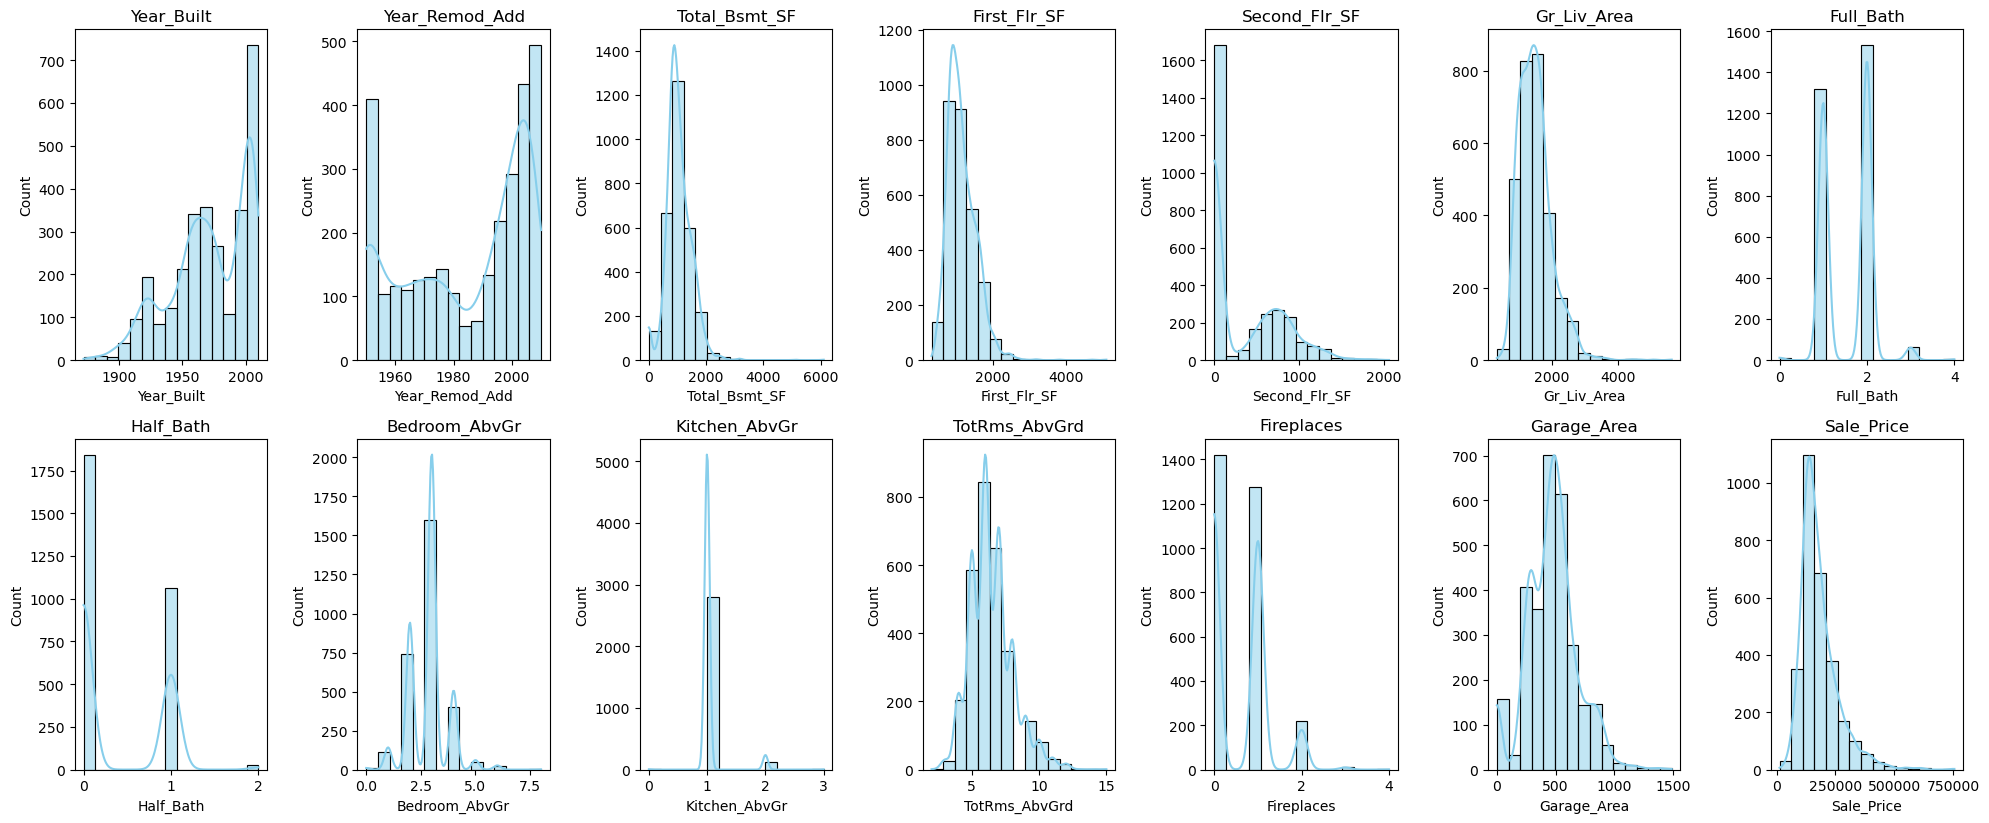

In [346]:
# Clean and pre-process the data if neccessary
print(df.head())
print(df.describe())
missing_count_values = df.isnull().sum()
print(missing_count_values)

#need to determine before processing the data whether it needs to be normalized or standardized
# Plot histograms
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(df):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=15, color="skyblue")
    axes[i].set_title(col)

# Remove empty subplots if dataset has fewer cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



# EDA Continued 
Generating the correlation matrix to determine relationships between Sale_Price and other key numerical features.  
This helps identify which variables are most strongly associated with property value — guiding which predictors to use in our regression models.


   Year_Built  Year_Remod_Add  Total_Bsmt_SF  First_Flr_SF  Second_Flr_SF  \
0        1960            1960           1080          1656              0   
1        1961            1961            882           896              0   
2        1958            1958           1329          1329              0   
3        1968            1968           2110          2110              0   
4        1997            1998            928           928            701   

   Gr_Liv_Area  Full_Bath  Half_Bath  Bedroom_AbvGr  Kitchen_AbvGr  \
0         1656          1          0              3              1   
1          896          1          0              2              1   
2         1329          1          1              3              1   
3         2110          2          1              3              1   
4         1629          2          1              3              1   

   TotRms_AbvGrd  Fireplaces  Garage_Area  Sale_Price  
0              7           2          528      215000  
1   

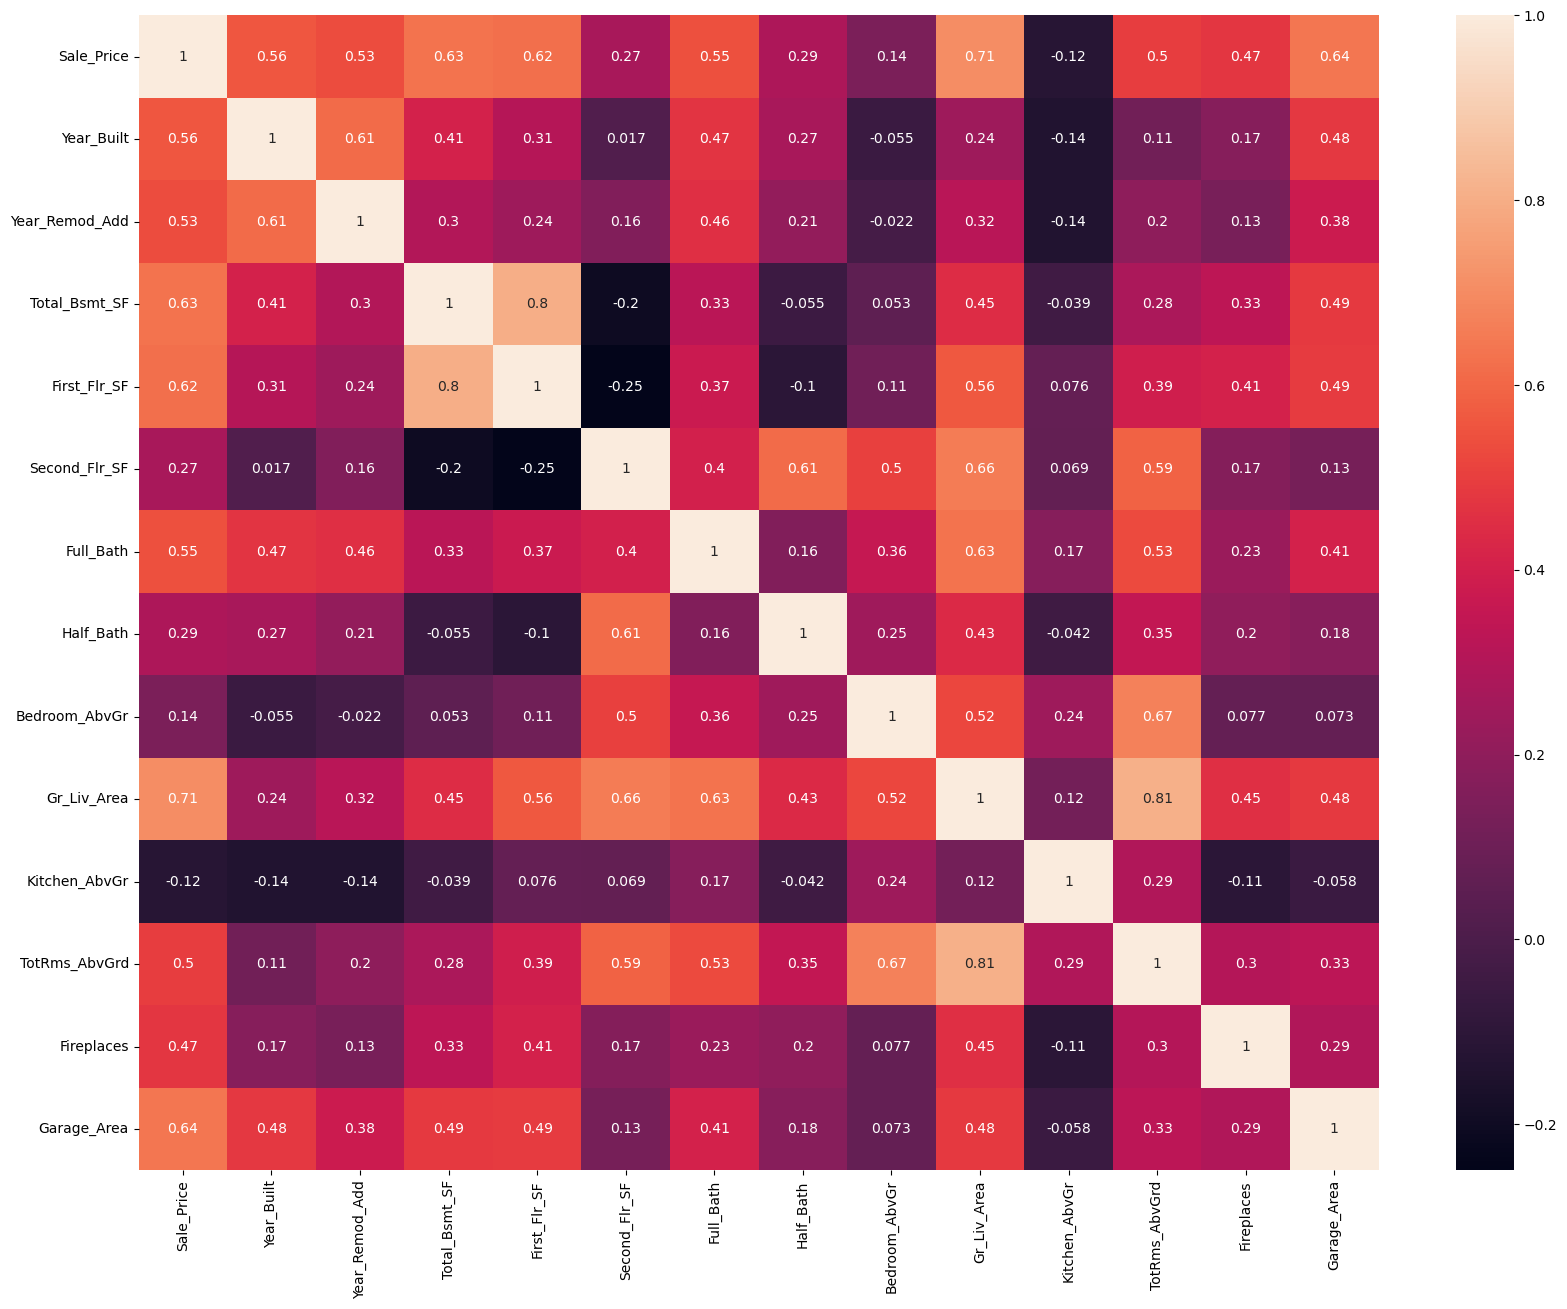

In [347]:
# Explore the data with visualisations such as histograms and correlation matrices
print(df.head(5))
corr = df[["Sale_Price","Year_Built", "Year_Remod_Add", "Total_Bsmt_SF","First_Flr_SF","Second_Flr_SF","Full_Bath", "Half_Bath"
         , "Bedroom_AbvGr", "Gr_Liv_Area", "Kitchen_AbvGr", "TotRms_AbvGrd", "Fireplaces", "Garage_Area"]].corr()
print(corr["Sale_Price"].sort_values(ascending =False))
plt.figure(figsize=(20, 15))  # increase width and height
sns.heatmap(corr, annot=True)
plt.show()


# Interpretation of the correlation matrix:
Gr_Liv_Area shows the strongest positive correlation with Sale_Price (r = 0.71), followed by Garage_Area (r = 0.65). This suggests that larger living areas and garages are major drivers of house prices in Ames. Other variables like Year_Built and Total_Bsmt_SF show moderate correlations, indicating newer or larger homes generally sell for more.

# Splitting Variables and Scaling the Data  
separate the independent variables (`Gr_Liv_Area` and `Garage_Area`) from the **dependent variable** (`Sale_Price`).  
Since both predictors show a roughly bell-shaped (normal) distribution**, applying a StandardScaler is appropriate — this ensures each variable has a mean of 0 and a standard deviation of 1, allowing the regression model to treat both predictors equally regardless of their original units or scales.


In [ ]:
# Split the independent variables from the dependent variable
# Defining independent variables
X = df[["Gr_Liv_Area","Garage_Area"]]
# Scale X 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_data, columns = X.columns) #independent variables
# Define dependent variable
y = df["Sale_Price"] #dependent variable

# Visualizing Relationships Between Variables  
To better understand how each predictor relates to the target variable `Sale_Price`, 
plot scatter diagrams for:  
Above Ground Living Area `Gr_Liv_Area` vs Sale Price  
Garage Area `Garage_Area` vs Sale Price** 

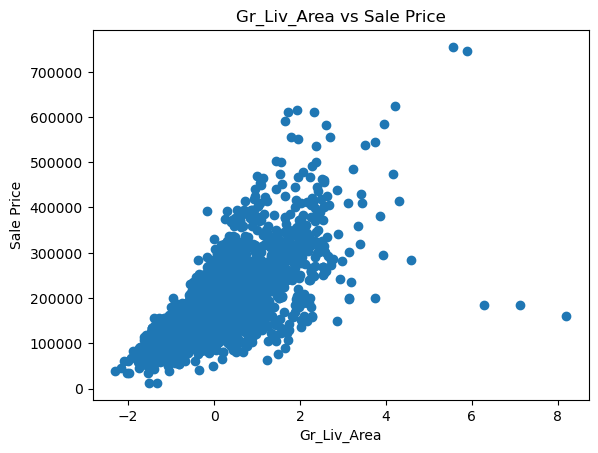

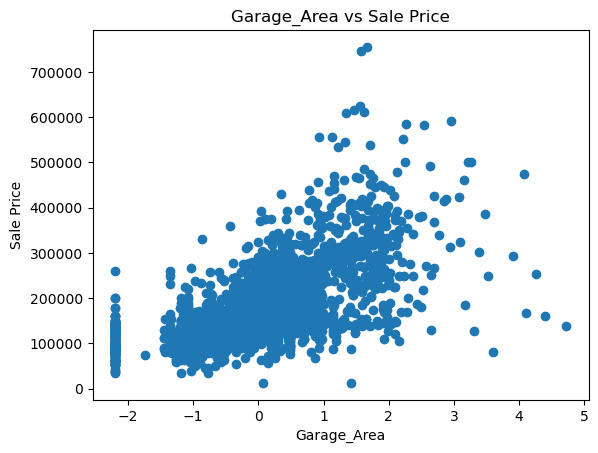

In [349]:
# Generate plots to explore the relationships between the independent and dependent variables
X_Gr_Liv_Area = X_scaled["Gr_Liv_Area"]
plt.scatter(X_Gr_Liv_Area, y)
plt.title("Gr_Liv_Area vs Sale Price")
plt.xlabel("Gr_Liv_Area")
plt.ylabel("Sale Price")
plt.show()

# Plot of Garage vs Sales Price
X_Garage_Area = X_scaled["Garage_Area"]
plt.scatter(X_Garage_Area, y)
plt.title("Garage_Area vs Sale Price")
plt.xlabel("Garage_Area")
plt.ylabel("Sale Price")
plt.show()


# Interpretation of charts:

These plots show that a linear relationships exist — a key assumption for multiple linear regression.  
A clear upward trend in both graphs suggests that as `Gr_Liv_Area` or `Garage_Area` increase, the `Sale_Price` tends to increase as well.


# Splitting the data into Training and Test 

In [350]:
# Create a training and test set with a 75:25 split ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, shuffle = True, random_state = 42)

# Multiple Linear Regression - Model 1

In [351]:
# Build a multiple linear regression model using 'Gr_Liv_Area' and 'Garage_Area'
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Evaluate Performance

In [352]:
# Print the trained model's intercept and coefficients
print("Intercept:", multiple_model.intercept_)

# Print each feature with its coefficient
for feature, coef in zip(X_train.columns, multiple_model.coef_):
    print(f"{feature}: {coef}")

Intercept: 179669.19830838894
Gr_Liv_Area: 39773.155432193416
Garage_Area: 30367.567653115828


# Interpreting Model Coefficients  
From the regression output:  
- Intercept: 179,669  
- Coefficient for `Gr_Liv_Area`:** 39,773  
- Coefficient for `Garage_Area`:** 30,368  

Interpretation:
- The intercept (179,669) represents the estimated baseline sale price when both living area and garage area are zero. While this isn’t meaningful in a real-world sense (no house has zero size), it serves as the model’s starting point.  
- For every unit increase in `Gr_Liv_Area`, the sale price increases by approximately 39,773.  
- For every unit increase in `Garage_Area`, the sale price increases by approximately 30,368.  

Both coefficients are positive, confirming that larger homes and garages are associated with higher sale prices — consistent with expectations for real estate data.


# Model 1 Prediction

In [353]:
# Generate predictions for the test set
y_pred_test = multiple_model.predict(X_test)

# Evaluate Model 1 Performance

In [354]:
# Evaluate the model's performance by computing the mean squared error (MSE) or root mean squared error (RMSE) on the test set using sklearn.metrics.
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)

Mean Squared Error: 2634371879.6902113
Root mean squared error: 51326.132522236774


# Interpretation:
RMSE of R51,326 suggests the model’s predictions deviate by about 6% on average.  This is not bad for a simple model based on 2 features.


# Residual and Error Analysis

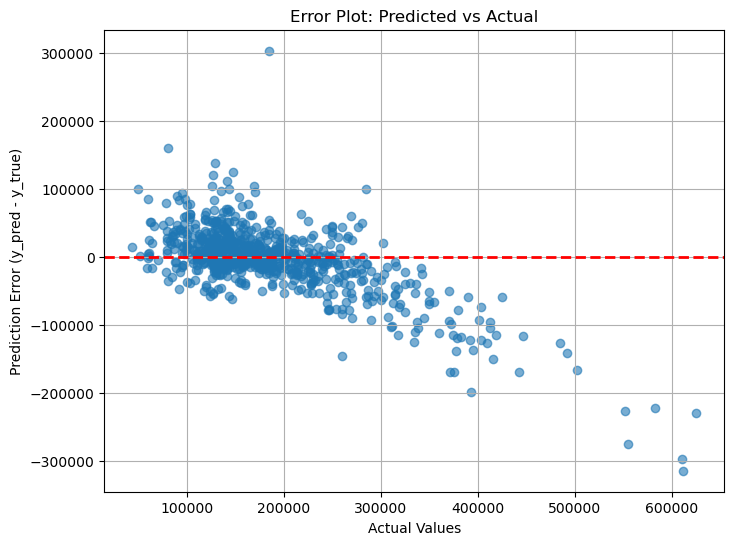

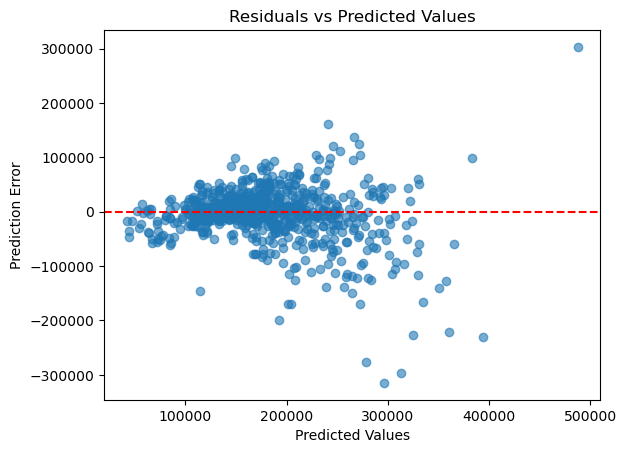

In [355]:
# Generate an error plot to visualise the differences between the predicted and actual values in the test set.

error = y_pred_test - y_test

plt.figure(figsize=(8, 6))
plt.scatter(y_test, error, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # reference line
plt.xlabel("Actual Values")
plt.ylabel("Prediction Error (y_pred - y_true)")
plt.title("Error Plot: Predicted vs Actual")
plt.grid(True)
plt.show()

plt.scatter(y_pred_test, error, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Prediction Error")
plt.title("Residuals vs Predicted Values")
plt.show()


# Observations:
The residuals show that for higher-priced homes, the model tends to underestimate prices.  
There may be non-linear relationships or missing predictors not captured in this model.

# Model 1 Coefficients

In [356]:
# Print the coefficients and interpret them within the context of the median value prediction.

# assuming your model is called 'model' and your features are in X_test
coefficients = pd.DataFrame({
    'Feature': X_test.columns,
    'Coefficient': multiple_model.coef_
})

print("Intercept:", multiple_model.intercept_)
print(coefficients)

Intercept: 179669.19830838894
       Feature   Coefficient
0  Gr_Liv_Area  39773.155432
1  Garage_Area  30367.567653


# Interpret coefficients in the context of the prediction:
Predicted Median Value =179,669.20 + (39,773.16 × Gr_Liv_Area)+(30,367.57 × Garage_Area)

179,669.20
This is the baseline predicted value when both Gr_Liv_Area (above-ground living area) and Garage_Area are 0.
This situation isn’t realistic (a house with no living area or garage), but it sets the starting point for regression line.

Coefficient = 39773.15
Larger living spaces are strongly associated with higher home values — each extra unit of living area adds roughly R39,773 to the predicted price.

Coefficient = 30367.5
Bigger garages also increase value, but slightly less than living area in this model.

**Summarise findings**
On average, the model’s predictions differ from the actual home values by about R51,326 (rmse)

Since home prices appear to range roughly between R12000 and R755,000, this means prediction error is about 7% of the total price range, which is okay.
Error plot shows a clear downward trend — as the actual value increases, the prediction error becomes more negative.
The model overpredicts lower-priced homes (errors above zero).
The model underpredicts higher-priced homes (errors below zero).
It doesn’t capture the full variation in home values, especially at the high end.

Suggestion for improvement would be to add more features, for example number of rooms, year built, number of bathrooms, total basement SF...

Optional Challenge

Intercept: 180101.15714238028
Gr_Liv_Area: 35307.68611132439
Garage_Area: 14390.396536449065
Total_Bsmt_SF: 15693.398087691758
First_Flr_SF: 928.1249716755101
Year_Built: 22028.038929092087
Mean Squared Error: 1782563730.9910154
Root mean squared error: 42220.418413263214


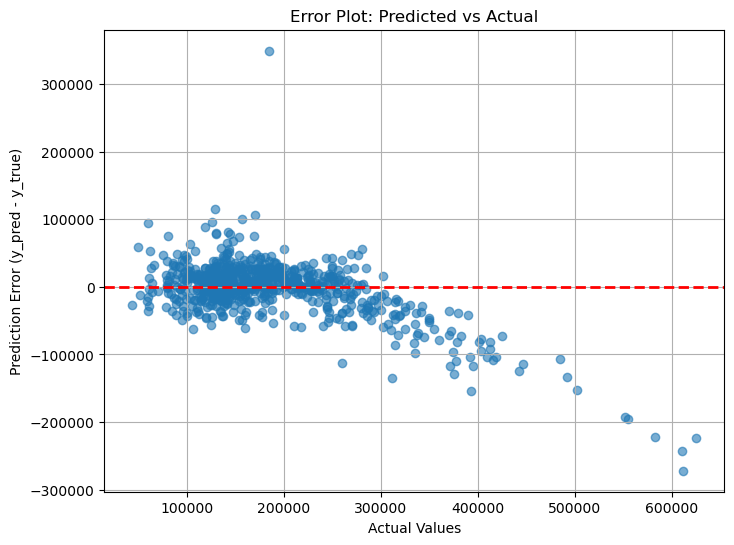

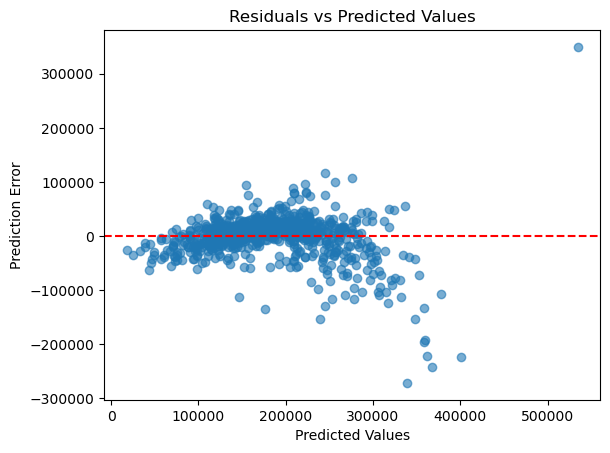

In [360]:
X_new = df[["Gr_Liv_Area","Garage_Area", "Total_Bsmt_SF","First_Flr_SF", "Year_Built"]]
# Scale X 
scaler = StandardScaler()
scaled_data_new = scaler.fit_transform(X_new)
X_scaled_new = pd.DataFrame(scaled_data_new, columns = X_new.columns) #independent variables
# Define dependent variable
y = df["Sale_Price"] #dependent variable

# Create a training and test set with a 75:25 split ratio
X_train, X_test, y_train, y_test = train_test_split(X_scaled_new, y, test_size = 0.25, shuffle = True, random_state = 42)

model = LinearRegression()
model.fit(X_train,y_train)
# Print the trained model's intercept and coefficients
print("Intercept:", model.intercept_)

# Print each feature with its coefficient
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")

    # Generate predictions for the test set
y_pred_test = model.predict(X_test)
# Evaluate the model's performance by computing the mean squared error (MSE) or root mean squared error (RMSE) on the test set using sklearn.metrics.
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)

error = y_pred_test - y_test

plt.figure(figsize=(8, 6))
plt.scatter(y_test, error, alpha=0.6)
plt.axhline(0, color='red', linestyle='--', linewidth=2)  # reference line
plt.xlabel("Actual Values")
plt.ylabel("Prediction Error (y_pred - y_true)")
plt.title("Error Plot: Predicted vs Actual")
plt.grid(True)
plt.show()

plt.scatter(y_pred_test, error, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Prediction Error")
plt.title("Residuals vs Predicted Values")
plt.show()

# Summary
The first Model only used `Gr_Liv_Area` and `Garage_Area`  - RMSE ≈ 51.3k
The second Model included additional features (`Total_Bsmt_SF`, `First_Flr_SF`, `Year_Built`) -  RMSE ≈ 42k
Both models show that living area is the most significant driver of sale price.
The model slightly underestimates high-end homes, suggesting missing nonlinear or neighborhood effects.
Adding features like neighborhood, lot size, or number of bathrooms could improve predictions.

# Conclusion:
This analysis demonstrates how linear regression can effectively predict home prices using property features.  
Even simple models perform reasonably well, but richer datasets with more structural and locational variables would lead to stronger, more reliable predictions.